In [124]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import OneHotEncoder
import xgboost as xgb
from matplotlib import pyplot
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_pickle("data.pkl")

In [3]:
df.shape

(429200, 85)

In [4]:
df.head()

,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_FATAL INJURIES_INCAPACITATING,INJURIES_FATAL INJURIES_NON_INCAPACITATING,INJURIES_FATAL INJURIES_REPORTED_NOT_EVIDENT,INJURIES_FATAL INJURIES_NO_INDICATION,INJURIES_INCAPACITATING INJURIES_NON_INCAPACITATING,INJURIES_INCAPACITATING INJURIES_REPORTED_NOT_EVIDENT,INJURIES_INCAPACITATING INJURIES_NO_INDICATION,INJURIES_NON_INCAPACITATING INJURIES_REPORTED_NOT_EVIDENT,TRAFFIC_CONTROL_DEVICE_DELINEATORS,TRAFFIC_CONTROL_DEVICE_FLASHING CONTROL SIGNAL,TRAFFIC_CONTROL_DEVICE_LANE USE MARKING,TRAFFIC_CONTROL_DEVICE_NO PASSING,TRAFFIC_CONTROL_DEVICE_OTHER RAILROAD CROSSING,TRAFFIC_CONTROL_DEVICE_OTHER REG. SIGN,TRAFFIC_CONTROL_DEVICE_OTHER WARNING SIGN,TRAFFIC_CONTROL_DEVICE_PEDESTRIAN CROSSING SIGN,TRAFFIC_CONTROL_DEVICE_POLICE/FLAGMAN,TRAFFIC_CONTROL_DEVICE_RAILROAD CROSSING GATE,TRAFFIC_CONTROL_DEVICE_RR CROSSING SIGN,TRAFFIC_CONTROL_DEVICE_SCHOOL ZONE,TRAFFIC_CONTROL_DEVICE_YIELD,WEATHER_CONDITION_CLOUDY,WEATHER_CONDITION_FOG,WEATHER_CONDITION_RAIN,WEATHER_CONDITION_SNOW,WEATHER_CONDITION_UNKNOWN/OTHER,"LIGHTING_CONDITION_DARKNESS, LIGHTED ROAD",LIGHTING_CONDITION_DUSK/DAWN,LIGHTING_CONDITION_UNKNOWN,FIRST_CRASH_TYPE_ANIMAL,FIRST_CRASH_TYPE_FIXED OBJECT,FIRST_CRASH_TYPE_HEAD ON,FIRST_CRASH_TYPE_OTHER,FIRST_CRASH_TYPE_OVERTURNED,FIRST_CRASH_TYPE_PARKED MOTOR VEHICLE,FIRST_CRASH_TYPE_PEDALCYCLIST,FIRST_CRASH_TYPE_PEDESTRIAN,FIRST_CRASH_TYPE_REAR END,FIRST_CRASH_TYPE_REAR TO FRONT,FIRST_CRASH_TYPE_REAR TO REAR,FIRST_CRASH_TYPE_REAR TO SIDE,FIRST_CRASH_TYPE_SIDESWIPE OPPOSITE DIRECTION,FIRST_CRASH_TYPE_SIDESWIPE SAME DIRECTION,FIRST_CRASH_TYPE_TRAIN,FIRST_CRASH_TYPE_TURNING,TRAFFICWAY_TYPE_CENTER TURN LANE,TRAFFICWAY_TYPE_DIVIDED - W/MEDIAN BARRIER,TRAFFICWAY_TYPE_DRIVEWAY,TRAFFICWAY_TYPE_INTERSECTION,TRAFFICWAY_TYPE_PARKING LOT,TRAFFICWAY_TYPE_RAMP,TRAFFICWAY_TYPE_UNKNOWN/OTHER,ROADWAY_SURFACE_COND_SNOW,ROADWAY_SURFACE_COND_UNKNOWN/OTHER,ROADWAY_SURFACE_COND_WET,ROAD_DEFECT_NO DEFECTS,"ROAD_DEFECT_RUT, HOLES",ROAD_DEFECT_SHOULDER DEFECT,ROAD_DEFECT_WORN SURFACE,"DAMAGE_$501 - $1,500","DAMAGE_OVER $1,500",PRIM_CONTRIBUTORY_CAUSE_BICYCLE ADVANCING LEGALLY ON RED LIGHT,PRIM_CONTRIBUTORY_CAUSE_CELL PHONE USE OTHER THAN TEXTING,PRIM_CONTRIBUTORY_CAUSE_DISREGARDING OTHER TRAFFIC SIGNS,PRIM_CONTRIBUTORY_CAUSE_DISREGARDING ROAD MARKINGS,PRIM_CONTRIBUTORY_CAUSE_DISREGARDING YIELD SIGN,PRIM_CONTRIBUTORY_CAUSE_DISTRACTION - FROM OUTSIDE VEHICLE,"PRIM_CONTRIBUTORY_CAUSE_DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)",PRIM_CONTRIBUTORY_CAUSE_DRIVING ON WRONG SIDE/WRONG WAY,"PRIM_CONTRIBUTORY_CAUSE_EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST",PRIM_CONTRIBUTORY_CAUSE_EXCEEDING AUTHORIZED SPEED LIMIT,PRIM_CONTRIBUTORY_CAUSE_EXCEEDING SAFE SPEED FOR CONDITIONS,PRIM_CONTRIBUTORY_CAUSE_HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE),PRIM_CONTRIBUTORY_CAUSE_MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT,PRIM_CONTRIBUTORY_CAUSE_OBSTRUCTED CROSSWALKS,PRIM_CONTRIBUTORY_CAUSE_PASSING STOPPED SCHOOL BUS,PRIM_CONTRIBUTORY_CAUSE_RELATED TO BUS STOP,PRIM_CONTRIBUTORY_CAUSE_ROAD CONSTRUCTION/MAINTENANCE,PRIM_CONTRIBUTORY_CAUSE_ROAD ENGINEERING/SURFACE/MARKING DEFECTS,PRIM_CONTRIBUTORY_CAUSE_TEXTING,PRIM_CONTRIBUTORY_CAUSE_TURNING RIGHT ON RED,season_Summer,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0

## Lasso

In [5]:
target = df['target']
df_features = df.drop(columns = ['target'])

In [6]:
lasso = Lasso(alpha = 0.01, normalize=False)
lasso.fit(df_features, target)

Lasso(alpha=0.01)

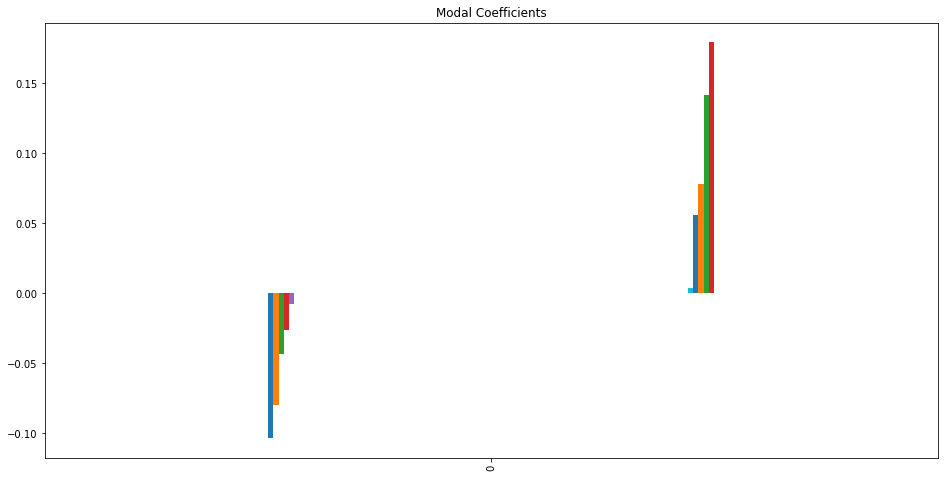

In [7]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = df_features.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [8]:
lasso_coef01.T

,0
FIRST_CRASH_TYPE_SIDESWIPE SAME DIRECTION,-0.103297
FIRST_CRASH_TYPE_PARKED MOTOR VEHICLE,-0.079616
FIRST_CRASH_TYPE_REAR END,-0.043420
"DAMAGE_$501 - $1,500",-0.026645
TRAFFICWAY_TYPE_PARKING LOT,-0.007879
"ROAD_DEFECT_RUT, HOLES",-0.000000
ROAD_DEFECT_NO DEFECTS,0.000000
ROADWAY_SURFACE_COND_WET,0.000000
ROADWAY_SURFACE_COND_UNKNOWN/OTHER,-0.000000
ROADWAY_SURFACE_COND_SNOW,-0.000000


In [9]:
df_lr = df_features

In [10]:
lasso_drop = list(lasso_coef01.T[lasso_coef01.T[0] == 0].index)

In [11]:
df_lr.drop(columns = lasso_drop, inplace = True)

In [12]:
df_lr.shape

(429200, 10)

In [13]:
df_lr.head()

,INJURIES_INCAPACITATING,INJURIES_INCAPACITATING INJURIES_NO_INDICATION,"LIGHTING_CONDITION_DARKNESS, LIGHTED ROAD",FIRST_CRASH_TYPE_PARKED MOTOR VEHICLE,FIRST_CRASH_TYPE_PEDESTRIAN,FIRST_CRASH_TYPE_REAR END,FIRST_CRASH_TYPE_SIDESWIPE SAME DIRECTION,TRAFFICWAY_TYPE_PARKING LOT,"DAMAGE_$501 - $1,500","DAMAGE_OVER $1,500"
0,0.0,0.0,0,1,0,0,0,0,0,1
1,0.0,0.0,0,0,0,0,1,0,0,1
2,0.0,0.0,0,0,0,0,1,0,0,1
3,0.0,0.0,0,0,0,0,0,0,0,1
4,0.0,0.0,1,0,0,0,0,0,0,1


## Logistic Regression with Lasso

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df_lr, target, random_state=1)
scaler = StandardScaler() 
scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [15]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_train = logreg.predict(X_train)
y_pred = logreg.predict(X_test)


In [16]:
print(metrics.f1_score(y_train, y_pred_train))
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.f1_score(y_test, y_pred))

0.37923635457976507
0.7981267474370922
0.37999828262300706


In [17]:
f1_scores = {}
f1_scores['Logistic with Lasso'] = metrics.f1_score(y_test, y_pred)

## Logistic without Lasso

In [18]:
target = df['target']
df_features = df.drop(columns = ['target'])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=1)
scaler = StandardScaler() 
scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [20]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_train = logreg.predict(X_train)
y_pred = logreg.predict(X_test)

/Users/singh/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [21]:
print(metrics.f1_score(y_train, y_pred_train))
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.f1_score(y_test, y_pred))

0.47523706384215114
0.8146039142590866
0.4760725855303011


In [22]:
df_features.shape


(429200, 84)

In [23]:
f1_scores['Logistic without Lasso'] = metrics.f1_score(y_test, y_pred)

In [24]:
f1_scores

{'Logistic with Lasso': 0.37999828262300706,
 'Logistic without Lasso': 0.4760725855303011}

## Logistic with Class weight balanced


In [30]:
lr_clf_weighted = LogisticRegression(solver='liblinear', class_weight = 'balanced')
lr_clf_weighted.fit(X_train, y_train)
y_weighted_train = lr_clf_weighted.predict(X_train)
y_weighted_test = lr_clf_weighted.predict(X_test)

f1_train = metrics.f1_score(y_train, y_weighted_train)
f1_test = metrics.f1_score(y_test, y_weighted_test)
print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_weighted_test))
print('Train F1 score: ', f1_train)
print('Test F1 score: ', f1_test)

Test Accuracy score:  0.7370922646784716
Train F1 score:  0.5716007067674502
Test F1 score:  0.5725368972936933


In [98]:
len(lr_clf_weighted.coef_[0])

84

In [96]:
len(df_features.columns )

84

In [133]:
coef_names = list(zip(df_features.columns, lr_clf_weighted.coef_[0]))

In [134]:
log_bal = sorted(coef_names, key=lambda x: abs(x[1]), reverse = True)

In [135]:
log_bal[0:15]

[('INJURIES_INCAPACITATING', 1.475666532643523),
 ('INJURIES_NON_INCAPACITATING INJURIES_REPORTED_NOT_EVIDENT',
  1.2574767688074235),
 ('DAMAGE_OVER $1,500', 0.8740446736753549),
 ('FIRST_CRASH_TYPE_SIDESWIPE SAME DIRECTION', -0.5497541600504745),
 ('FIRST_CRASH_TYPE_PEDESTRIAN', 0.537346113896044),
 ('TRAFFICWAY_TYPE_PARKING LOT', -0.40615565632857964),
 ('FIRST_CRASH_TYPE_PARKED MOTOR VEHICLE', -0.3725064443424737),
 ('INJURIES_FATAL', 0.3337314960630069),
 ('FIRST_CRASH_TYPE_REAR END', -0.31569734520378856),
 ('FIRST_CRASH_TYPE_PEDALCYCLIST', 0.28118287241499224),
 ('LIGHTING_CONDITION_DARKNESS, LIGHTED ROAD', 0.22839872934422406),
 ('INJURIES_FATAL INJURIES_INCAPACITATING', -0.1389535523762259),
 ('FIRST_CRASH_TYPE_TURNING', -0.1364874542930861),
 ('TRAFFICWAY_TYPE_INTERSECTION', 0.1326609231886395),
 ('INJURIES_INCAPACITATING INJURIES_NON_INCAPACITATING', 0.13026713361000572)]

In [31]:
f1_scores['Logistic with class weight balanced'] = f1_test

In [32]:
f1_scores

{'Logistic with Lasso': 0.37999828262300706,
 'Logistic without Lasso': 0.4760725855303011,
 'Logistic with class weight balanced': 0.5725368972936933}

## Decision Tree

In [118]:
clf = DecisionTreeClassifier(class_weight='balanced')

In [119]:
clf = clf.fit(X_train,y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Training F1 Score:",metrics.f1_score(y_train, y_pred_train))
df1 = metrics.f1_score(y_test, y_pred_test)
print("Testing F1 Score:",df1)

Training F1 Score: 0.5990110541696667
Testing F1 Score: 0.566314488919865


In [140]:
importance = clf.feature_importances_
dt_coef = list(zip(df_features.columns, importance))

In [141]:
dt_coef = sorted(coef_names, key=lambda x: abs(x[1]), reverse = True)
dt_coef[0:15]

[('INJURIES_INCAPACITATING', 1.475666532643523),
 ('INJURIES_NON_INCAPACITATING INJURIES_REPORTED_NOT_EVIDENT',
  1.2574767688074235),
 ('DAMAGE_OVER $1,500', 0.8740446736753549),
 ('FIRST_CRASH_TYPE_SIDESWIPE SAME DIRECTION', -0.5497541600504745),
 ('FIRST_CRASH_TYPE_PEDESTRIAN', 0.537346113896044),
 ('TRAFFICWAY_TYPE_PARKING LOT', -0.40615565632857964),
 ('FIRST_CRASH_TYPE_PARKED MOTOR VEHICLE', -0.3725064443424737),
 ('INJURIES_FATAL', 0.3337314960630069),
 ('FIRST_CRASH_TYPE_REAR END', -0.31569734520378856),
 ('FIRST_CRASH_TYPE_PEDALCYCLIST', 0.28118287241499224),
 ('LIGHTING_CONDITION_DARKNESS, LIGHTED ROAD', 0.22839872934422406),
 ('INJURIES_FATAL INJURIES_INCAPACITATING', -0.1389535523762259),
 ('FIRST_CRASH_TYPE_TURNING', -0.1364874542930861),
 ('TRAFFICWAY_TYPE_INTERSECTION', 0.1326609231886395),
 ('INJURIES_INCAPACITATING INJURIES_NON_INCAPACITATING', 0.13026713361000572)]

In [36]:
f1_scores['Decision Tree'] = df1

In [37]:
f1_scores

{'Logistic with Lasso': 0.37999828262300706,
 'Logistic without Lasso': 0.4760725855303011,
 'Logistic with class weight balanced': 0.5725368972936933,
 'Decision Tree': 0.5663952768652099}

## Random Forest

In [40]:
X_train, X_test, y_train, y_test = train_test_split(df_features, target, test_size=0.25, random_state=23 )

In [41]:
rfc = RandomForestClassifier(random_state = 1, n_estimators = 500, max_depth=2, n_jobs = -1)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=500, n_jobs=-1, random_state=1)

In [42]:
rfc_preds_train = rfc.predict(X_train)
rfc_preds = rfc.predict(X_test)

rfc_f1_train = metrics.f1_score(y_train, rfc_preds_train)
rfc_f1 = metrics.f1_score(y_test, rfc_preds)
print('Train F1 score: ', rfc_f1_train)
print('Test F1 score: ', rfc_f1)


Train F1 score:  0.07936169412000854
Test F1 score:  0.07357204714032908


In [43]:
f1_scores['Random Forest'] = rfc_f1

In [44]:
f1_scores

{'Logistic with Lasso': 0.37999828262300706,
 'Logistic without Lasso': 0.4760725855303011,
 'Logistic with class weight balanced': 0.5725368972936933,
 'Decision Tree': 0.5663952768652099,
 'Random Forest': 0.07357204714032908}

## Grid Search with Random Forest

In [53]:
params = { 
    'n_estimators': [100,500],
    'max_depth': [2,3,4],
    'max_features': [0.6, 0.7],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced']}

In [54]:
rf = RandomForestClassifier()
grid_tree = GridSearchCV(rf, params, cv=5, scoring='f1', n_jobs =-1, verbose = 1)
grid_tree.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 95.9min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 122.1min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4], 'max_features': [0.6, 0.7],
                         'n_estimators': [100, 500]},
             scoring='f1', verbose=1)

In [55]:
print(grid_tree.best_score_)

print(grid_tree.best_params_)

print(grid_tree.best_estimator_)


0.5356095036901612
{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 4, 'max_features': 0.6, 'n_estimators': 500}
RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4, max_features=0.6, n_estimators=500)


In [56]:
y_pred_train = grid_tree.best_estimator_.predict(X_train)
y_pred_test = grid_tree.best_estimator_.predict(X_test)


# checking accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_test))
print("Training F1:",metrics.f1_score(y_train, y_pred_train))
print("Test F1:",metrics.f1_score(y_test, y_pred_test))


Accuracy: 0.6653122087604846
Training F1: 0.5355843799327432
Test F1: 0.5381568455978806


In [59]:
f1_scores['Random Forest with Grid Search'] = metrics.f1_score(y_test, y_pred_test)

### Random Forest with class weight balanced 

In [132]:
rfc = RandomForestClassifier(class_weight = 'balanced',random_state = 1, n_estimators = 500, max_depth=2, n_jobs = -1, verbose = 1)
rfc.fit(X_train, y_train)
rfc_preds_train = rfc.predict(X_train)
rfc_preds = rfc.predict(X_test)

rfc_f1_train = metrics.f1_score(y_train, rfc_preds_train)
rfc_f1 = metrics.f1_score(y_test, rfc_preds)
print('Train F1 score: ', rfc_f1_train)
print('Test F1 score: ', rfc_f1)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   17.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    3.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    1.2s finis

Train F1 score:  0.5377603092223839
Test F1 score:  0.5403509686839978


In [142]:
rf_coef = list(zip(df_features.columns, rfc.feature_importances_))
rf_coef = sorted(coef_names, key=lambda x: abs(x[1]), reverse = True)

In [143]:
rf_coef[0:15]

[('INJURIES_INCAPACITATING', 1.475666532643523),
 ('INJURIES_NON_INCAPACITATING INJURIES_REPORTED_NOT_EVIDENT',
  1.2574767688074235),
 ('DAMAGE_OVER $1,500', 0.8740446736753549),
 ('FIRST_CRASH_TYPE_SIDESWIPE SAME DIRECTION', -0.5497541600504745),
 ('FIRST_CRASH_TYPE_PEDESTRIAN', 0.537346113896044),
 ('TRAFFICWAY_TYPE_PARKING LOT', -0.40615565632857964),
 ('FIRST_CRASH_TYPE_PARKED MOTOR VEHICLE', -0.3725064443424737),
 ('INJURIES_FATAL', 0.3337314960630069),
 ('FIRST_CRASH_TYPE_REAR END', -0.31569734520378856),
 ('FIRST_CRASH_TYPE_PEDALCYCLIST', 0.28118287241499224),
 ('LIGHTING_CONDITION_DARKNESS, LIGHTED ROAD', 0.22839872934422406),
 ('INJURIES_FATAL INJURIES_INCAPACITATING', -0.1389535523762259),
 ('FIRST_CRASH_TYPE_TURNING', -0.1364874542930861),
 ('TRAFFICWAY_TYPE_INTERSECTION', 0.1326609231886395),
 ('INJURIES_INCAPACITATING INJURIES_NON_INCAPACITATING', 0.13026713361000572)]

In [57]:
f1_scores['Random Forest with class balance'] = rfc_f1

In [60]:
f1_scores

{'Logistic with Lasso': 0.37999828262300706,
 'Logistic without Lasso': 0.4760725855303011,
 'Logistic with class weight balanced': 0.5725368972936933,
 'Decision Tree': 0.5663952768652099,
 'Random Forest': 0.07357204714032908,
 'Random Forest with class balance': 0.5403509686839978,
 'Random Forest with Grid Search': 0.5381568455978806}

### Decision Tree with Grid Search

In [64]:
dcg = DecisionTreeClassifier(class_weight='balanced',random_state=1)

In [65]:
parameters = {'criterion': ['gini', 'entropy'],
            'max_depth': range(1,10,2),
              'max_features': [0.5,0.6,0.7,0.8]
        }

In [66]:
grid_tree = GridSearchCV(dcg, parameters, cv=10, scoring='f1', verbose = 1, n_jobs = -1)
grid_tree.fit(X_train,y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  2.7min finished


GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10, 2),
                         'max_features': [0.5, 0.6, 0.7, 0.8]},
             scoring='f1', verbose=1)

In [67]:
print(grid_tree.best_score_)
print(grid_tree.best_params_)
print(grid_tree.best_estimator_)

0.5694184843920206
{'criterion': 'entropy', 'max_depth': 9, 'max_features': 0.7}
DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=9, max_features=0.7, random_state=1)


In [68]:
y_pred_test = grid_tree.best_estimator_.predict(X_test)
y_pred_train = grid_tree.best_estimator_.predict(X_train)
dcg_train = metrics.f1_score(y_train, y_pred_train)
dcg = metrics.f1_score(y_test, y_pred_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_test))
print("F1 train:",dcg_train)
print("F1 test:",dcg)

Accuracy: 0.7107176141658901
F1 train: 0.5563545515859067
F1 test: 0.5578221601755036


In [69]:
f1_scores['Decision tree with grid search'] = dcg

In [70]:
f1_scores

{'Logistic with Lasso': 0.37999828262300706,
 'Logistic without Lasso': 0.4760725855303011,
 'Logistic with class weight balanced': 0.5725368972936933,
 'Decision Tree': 0.5663952768652099,
 'Random Forest': 0.07357204714032908,
 'Random Forest with class balance': 0.5403509686839978,
 'Random Forest with Grid Search': 0.5381568455978806,
 'Decision tree with grid search': 0.5578221601755036}

### XG Boost

In [74]:
xg_clf = xgb.XGBClassifier(objective ='binary:logistic', 
                           colsample_bytree = 0.5, 
                           subsample = 0.5,
                           learning_rate = 0.1,
                           max_depth = 4, 
                           alpha = 1, 
                           n_estimators = 1000)
xg_clf.fit(X_train,y_train)

XGBClassifier(alpha=1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=1, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [77]:
preds_train = xg_clf.predict(X_train)
preds_test = xg_clf.predict(X_test)

xg_f1 = metrics.f1_score(y_test, preds_test)
xg_f1_train = metrics.f1_score(y_train, preds_train)
xg_acc = metrics.accuracy_score(y_test, preds_test)

print("Accuracy: %f" % (xg_acc))
print("F1 Test: %f" % (xg_f1))
print("F1 Train: %f" % (xg_f1))

Accuracy: 0.815974
F1 Test: 0.483062
F1 Train: 0.483062


In [78]:
f1_scores['XG Boost'] = xg_f1
f1_scores

{'Logistic with Lasso': 0.37999828262300706,
 'Logistic without Lasso': 0.4760725855303011,
 'Logistic with class weight balanced': 0.5725368972936933,
 'Decision Tree': 0.5663952768652099,
 'Random Forest': 0.07357204714032908,
 'Random Forest with class balance': 0.5403509686839978,
 'Random Forest with Grid Search': 0.5381568455978806,
 'Decision tree with grid search': 0.5578221601755036,
 'XG Boost': 0.48306194041572853}

### XG Boost with Grid Search

In [85]:
clf_xgb = xgb.XGBClassifier(objective = "binary:logistic")
param_dist = {'max_depth':[2,3],
              'eta':[0.1,0.2,],
              'n_estimators':[100, 200],
              'colsample_bytree':[ 0.6, 0.7],
              'learning_rate': [0.1, 0.2, 0.5]
             }

In [86]:
gsearch1 = GridSearchCV(
    estimator = clf_xgb,
    param_grid = param_dist, 
    scoring='f1',
    n_jobs=-1,
    verbose=1,
    iid=False, 
    cv=5)
gsearch1.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 23.8min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 99.2min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 135.0min finished
/Users/singh/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [87]:
gsearch1.best_params_

{'colsample_bytree': 0.6,
 'eta': 0.1,
 'learning_rate': 0.5,
 'max_depth': 3,
 'n_estimators': 200}

In [88]:
gsearch1.best_score_

0.4836650010679252

In [89]:
f1_scores['XG Boost with Grid Search'] = gsearch1.best_score_

In [90]:
f1_scores

{'Logistic with Lasso': 0.37999828262300706,
 'Logistic without Lasso': 0.4760725855303011,
 'Logistic with class weight balanced': 0.5725368972936933,
 'Decision Tree': 0.5663952768652099,
 'Random Forest': 0.07357204714032908,
 'Random Forest with class balance': 0.5403509686839978,
 'Random Forest with Grid Search': 0.5381568455978806,
 'Decision tree with grid search': 0.5578221601755036,
 'XG Boost': 0.48306194041572853,
 'XG Boost with Grid Search': 0.4836650010679252}

### Logistic Regression with Grid Search

In [150]:
params = { 
    'C': [0.01,0.1,1],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'max_iter': [100,200,300,500]}


In [151]:
lr_clf_grid = LogisticRegression(solver='liblinear', class_weight = 'balanced')

grid_search_lr = GridSearchCV(estimator = lr_clf_grid, param_grid = params, scoring='f1', cv=10, n_jobs=-1, verbose = 1)
grid_search_lr = grid_search_lr.fit(X_train,y_train)


Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   37.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  9.5min finished


In [152]:
grid_search_lr.best_score_

0.5709971332139474

In [153]:
grid_search_lr.best_params_

{'C': 1, 'max_iter': 100, 'penalty': 'l1'}

In [154]:
f1_scores['Logistic Regression with Grid Search'] = grid_search_lr.best_score_

In [155]:
f1_scores

{'Logistic with Lasso': 0.37999828262300706,
 'Logistic without Lasso': 0.4760725855303011,
 'Logistic with class weight balanced': 0.5725368972936933,
 'Decision Tree': 0.5663952768652099,
 'Random Forest': 0.07357204714032908,
 'Random Forest with class balance': 0.5403509686839978,
 'Random Forest with Grid Search': 0.5381568455978806,
 'Decision tree with grid search': 0.5578221601755036,
 'XG Boost': 0.48306194041572853,
 'XG Boost with Grid Search': 0.4836650010679252,
 'Logistic Regression with Grid Search': 0.5709971332139474}

### Voting Classifier

In [157]:
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=1)
scaler = StandardScaler()

In [160]:
lrv = LogisticRegression(solver='liblinear', class_weight = 'balanced')
dtv = DecisionTreeClassifier(class_weight='balanced')
rfv = RandomForestClassifier(class_weight = 'balanced',random_state = 1, n_estimators = 500, max_depth=2, n_jobs = -1, verbose = 1)


In [162]:
voting_clf = VotingClassifier(
                estimators=[('Logistic Regression', lrv), ('Decision tree', dtv), ('Random Forest', rfv)], 
                voting='hard', n_jobs = -1, verbose = 1 )

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('Logistic Regression',
                              LogisticRegression(class_weight='balanced',
                                                 solver='liblinear')),
                             ('Decision tree',
                              DecisionTreeClassifier(class_weight='balanced')),
                             ('Random Forest',
                              RandomForestClassifier(class_weight='balanced',
                                                     max_depth=2,
                                                     n_estimators=500,
                                                     n_jobs=-1, random_state=1,
                                                     verbose=1))],
                 n_jobs=-1, verbose=1)

In [163]:
vc_preds_train = voting_clf.predict(X_train)
vc_preds_test = voting_clf.predict(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    3.2s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    3.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    2.0s finished


In [164]:
vc_f1_train = metrics.f1_score(y_train, vc_preds_train)
vc_f1_test = metrics.f1_score(y_test, vc_preds_test)

In [165]:
print('f1 train: ', vc_f1_train )
print('f1 test: ', vc_f1_test )

f1 train:  0.5764415838983137
f1 test:  0.5720076840465278


In [167]:
f1_scores['Voting Classifier'] = vc_f1_test
f1_scores

{'Logistic with Lasso': 0.37999828262300706,
 'Logistic without Lasso': 0.4760725855303011,
 'Logistic with class weight balanced': 0.5725368972936933,
 'Decision Tree': 0.5663952768652099,
 'Random Forest': 0.07357204714032908,
 'Random Forest with class balance': 0.5403509686839978,
 'Random Forest with Grid Search': 0.5381568455978806,
 'Decision tree with grid search': 0.5578221601755036,
 'XG Boost': 0.48306194041572853,
 'XG Boost with Grid Search': 0.4836650010679252,
 'Logistic Regression with Grid Search': 0.5709971332139474,
 'Voting Classifier': 0.5720076840465278}

In [185]:
f1_scores['Bagging Classifier for Logistic'] = 0.36281786105365615

In [186]:
scores = pd.DataFrame.from_dict(f1_scores,orient='index',columns = ['f1-score'])

In [187]:
scores.sort_values(by = 'f1-score', ascending = False)

,f1-score
Logistic with class weight balanced,0.572537
Voting Classifier,0.572008
Logistic Regression with Grid Search,0.570997
Decision Tree,0.566395
Decision tree with grid search,0.557822
Random Forest with class balance,0.540351
Random Forest with Grid Search,0.538157
XG Boost with Grid Search,0.483665
XG Boost,0.483062
Logistic without Lasso,0.476073
